Libraries Imported
Data Loaded
Features normalized
Data has been split
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                 

/tmp/ipykernel_47120/137592376.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


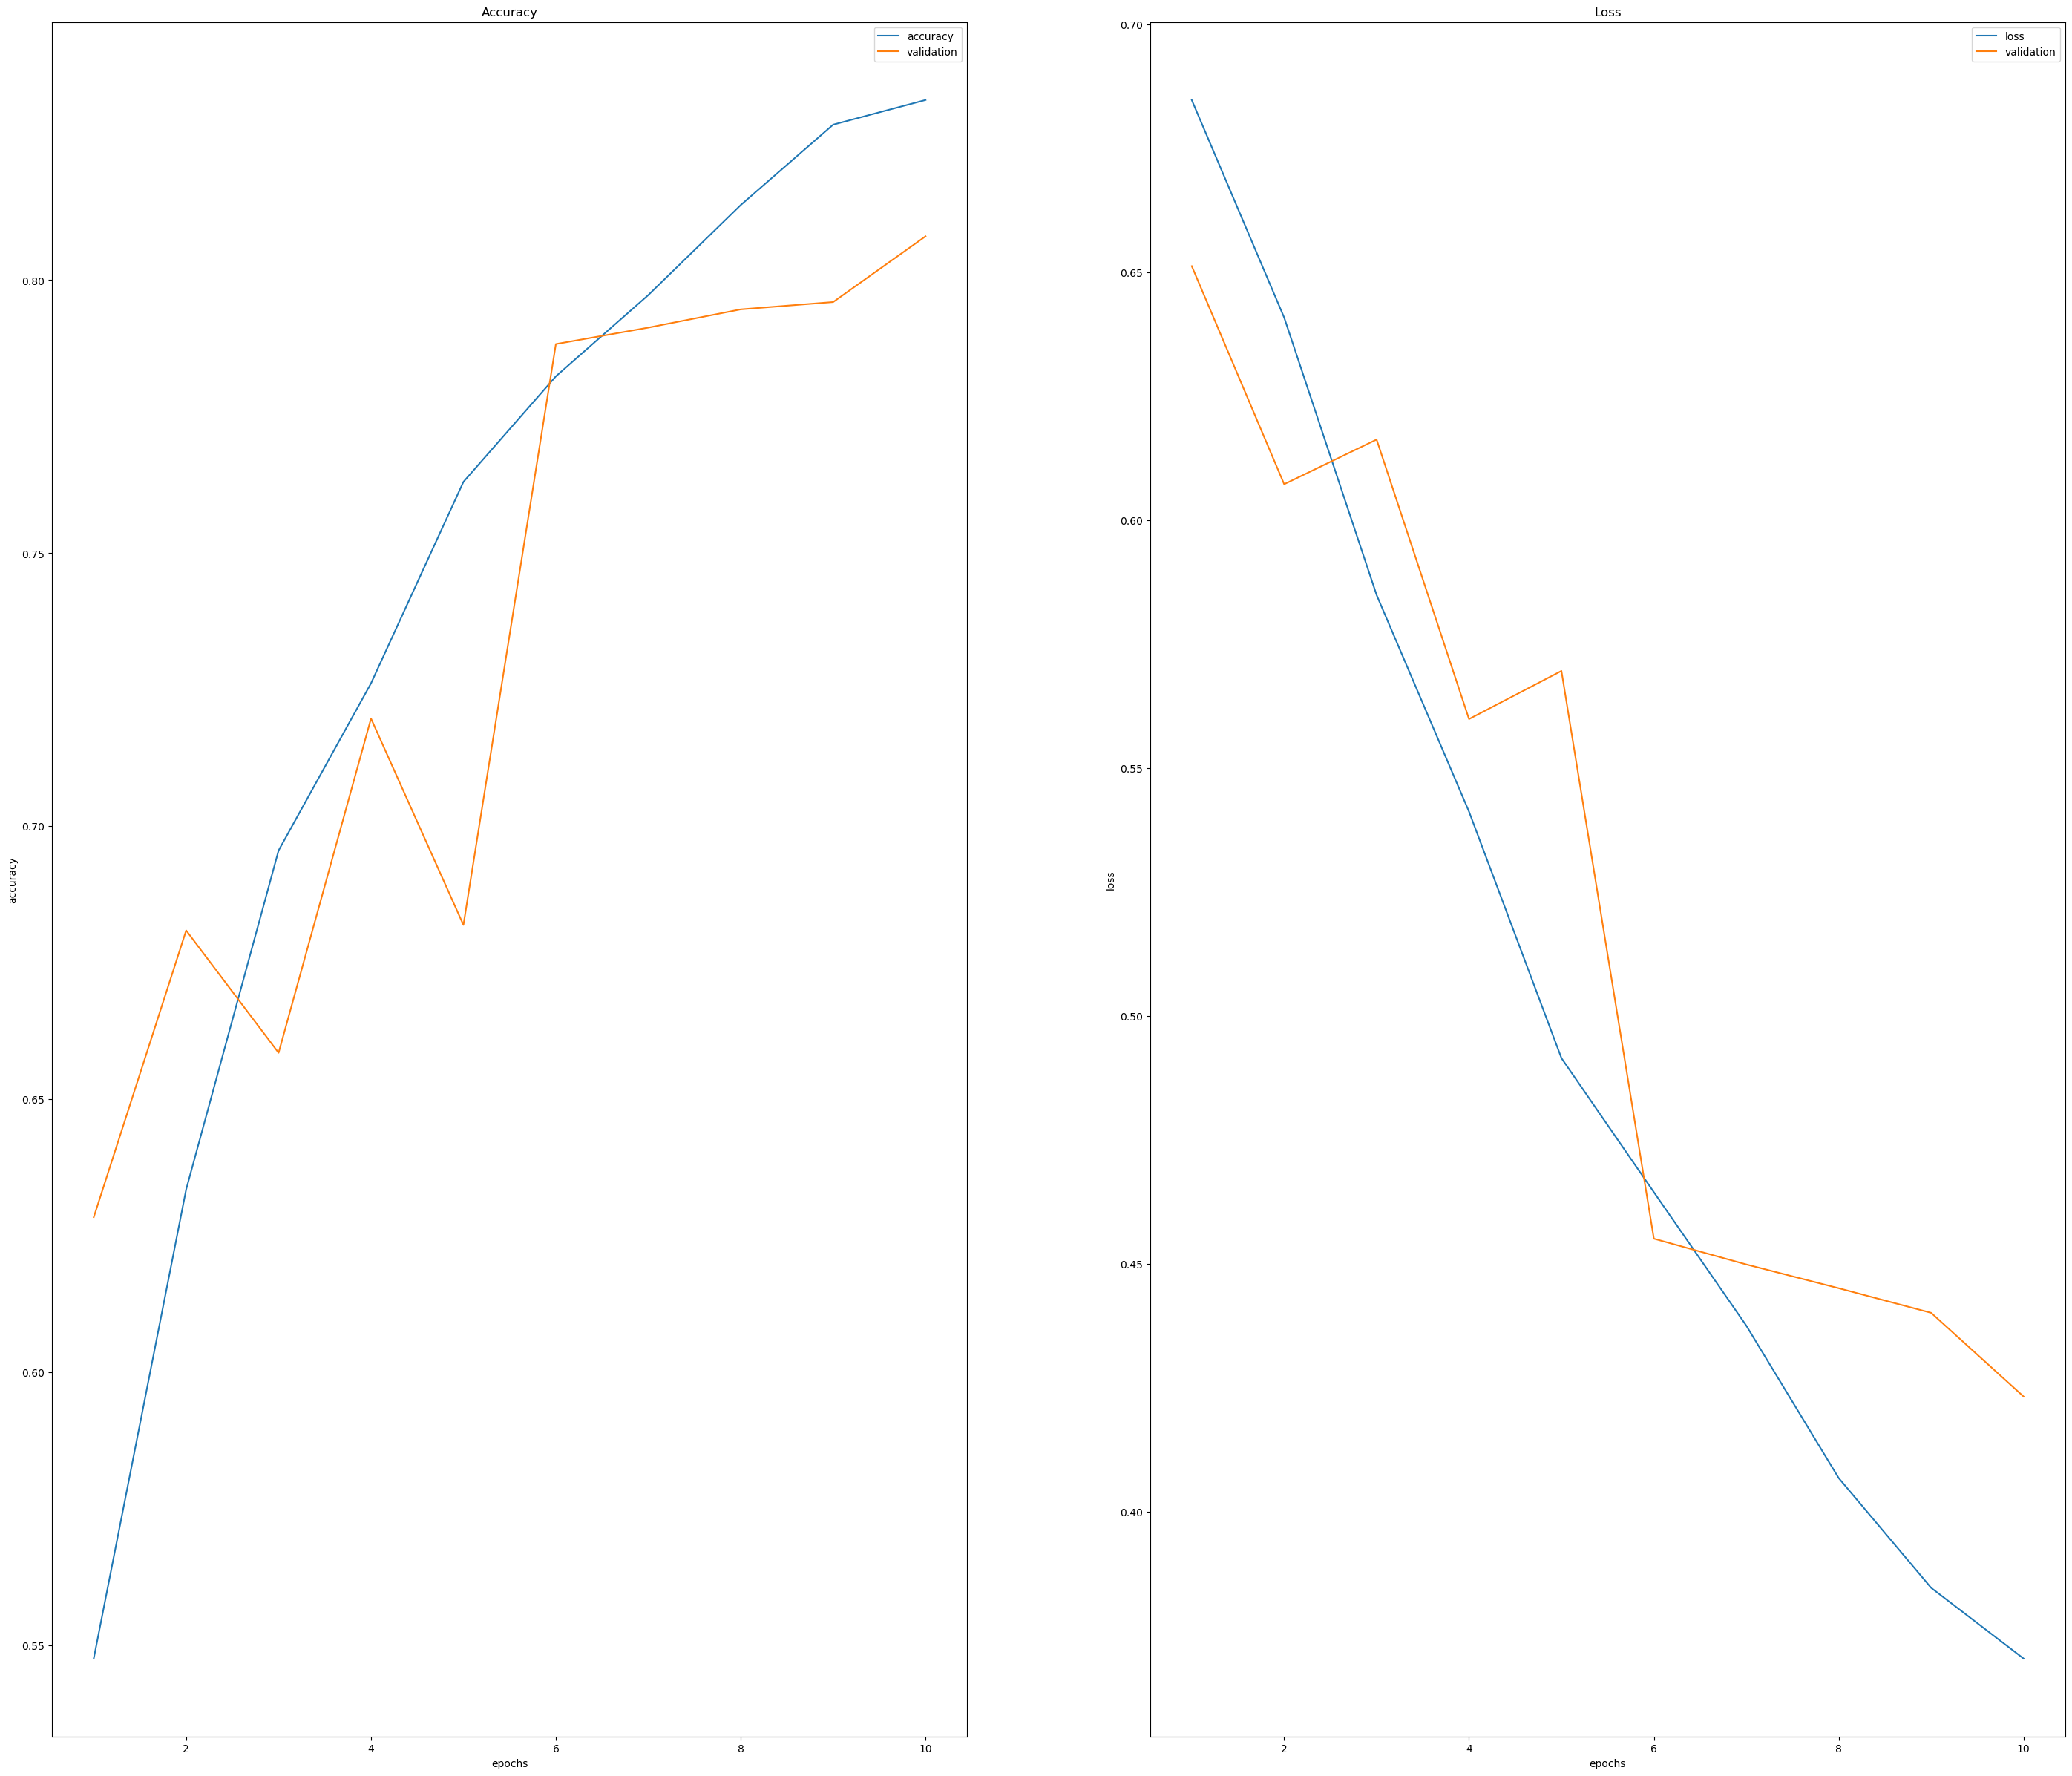

In [8]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print('Libraries Imported')

#Loading data
features = np.load('Data/Preprocessed/features.npy')
labels = np.load('Data/Preprocessed/labels.npy')
print('Data Loaded')

#Normalizing features
features = (features - features.min())/(features.max() - features.min())
print('Features normalized')

#Splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)
print('Data has been split')

#Building Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(50, 50, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

#Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

#Model Training
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

epochs = list(range(1,11))

fig, ax = plt.subplots(1, 2, figsize=(35, 30))
ax[0].plot(epochs, history.history['accuracy'], label='accuracy')
ax[0].plot(epochs, history.history['val_accuracy'], label='validation')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history.history['loss'], label='loss')
ax[1].plot(epochs, history.history['val_loss'], label='validation')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Loss')
ax[1].legend()

fig.show()